# Esonero 1 - 8 Aprile 2021

Completare i seguenti esercizi tramite uno o più blocchi di codice e descrivendo le operazioni effettuate

### Punteggio Esercizi

    1a: 1
    1b: 1.5
    1c: 2
    1d: 1
    2: 1.5
    3: 1
    4: 1
    5: 1


In [21]:
import numpy as np
from skimage.color import rgb2gray
from scipy.ndimage import convolve

import imageio
from skimage.color import rgb2gray
import os
from skimage import io
import skimage

import matplotlib.pyplot as plt
%matplotlib inline 

def myimshow(I, **kwargs):
    # utility function to show image
    plt.figure();
    plt.axis('off')
    plt.imshow(I, cmap=plt.gray(), **kwargs)

# Esercizio 1

## Filtri di Gabor

Il filtro di Gabor (in forma semplificata) è definito dalla seguente funzione che restituisce due parti (reale e immaginaria)


$$RE_g(x,y,\omega,\theta) = \frac{\omega^2}{4\pi^3}\left[\exp\left\{-(\omega^2/8\pi^2) (4x'^2 + y'^2)\right\}\right]\exp\left(\pi^2/2\right)(\omega x \cos \theta)$$

$$IM_g(x,y,\omega,\theta) = \frac{\omega^2}{4\pi^3}\left[\exp\left\{-(\omega^2/8\pi^2) (4x'^2 + y'^2)\right\}\right]\exp\left(\pi^2/2\right)(\omega x \sin \theta)$$

dove $x' = x \cos \theta + y \sin \theta$ e $y' = y \cos \theta. - x \sin \theta$. L'implementazione è data dal codice sottostante: 

In [44]:
zebra =  rgb2gray(imageio.imread('zebra.jpg'))

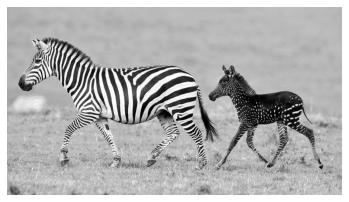

In [ ]:
myimshow(zebra)

In [117]:
def genGabor(sz, omega, theta, func=np.cos):
    radius = (int(sz[0]/2.0), int(sz[1]/2.0))
    [x, y] = np.meshgrid(range(-radius[0], radius[0]), range(-radius[1], radius[1]))

    x1 = x * np.cos(theta) + y * np.sin(theta)
    y1 = -x * np.sin(theta) + y * np.cos(theta)
    
    gauss = omega**2 / (4*np.pi**3) * np.exp(- omega**2 / (8*np.pi**2) * ( 4 * x1**2 + y1**2))
    sinusoid = func(omega * x1) * np.exp(np.pi**2 / 2)
    gabor = gauss * sinusoid
    return gabor

`sz` rappresenta la dimensione del filtro, `omega` la frequenza e `theta` l'orientamento.

1. Plottare il filtro per valori a scelta dei parametri

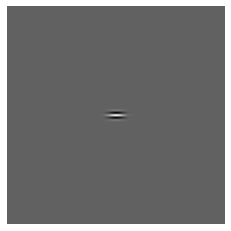

In [118]:
gabor = genGabor((512,512),0.5,np.pi/2)
myimshow(gabor)

2. Applicare il filtro di Gabor alla figura della zebra e plottare il risultato. Cosa potete dire del filtro?

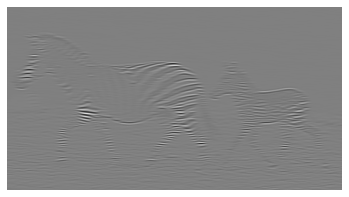

In [124]:
from scipy.signal import convolve2d
z_gabor = genGabor((64,64),0.5,np.pi/2)
myimshow(convolve2d(zebra, z_gabor, mode='valid'))

3. Aggiustare i parametri di ampiezza e rotazione per individuare le strisce verticali. plottare il risultato

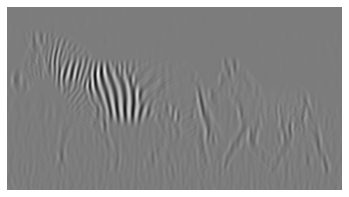

In [125]:
z_gabor_2 = genGabor((64,64),0.2,0)
myimshow(convolve2d(zebra, z_gabor_2, mode='valid'))

Per la seguente immagine _gabor1.jpg_

![](gabor1.jpg)

4. Qual è il filtro più semplice che permetterebbe di individuare i contorni? Giustificare la risposta

Avremmo potuto utilizzare il l'algoritmo di edge detection di Canny

In [127]:
img_byte = 

[[173.6553 172.6553 171.6553 ... 182.7312 183.7312 182.7312]
 [173.6553 172.6553 172.6553 ... 182.7312 183.7312 182.7312]
 [170.6553 170.6553 171.6553 ... 182.7312 182.7312 182.7312]
 ...
 [160.6679 142.8804 150.8804 ... 186.2896 189.4338 191.0068]
 [154.2391 134.2391 140.2391 ... 185.7204 187.7925 188.9367]
 [149.8141 127.8141 133.2391 ... 185.7945 187.2233 187.2954]]


# Esercizio 2

Riconoscere il filtro che ha generato questa immagine a partire dall'immagine contenente le forme. Fornire un esempio.

![](filter2.jpg)

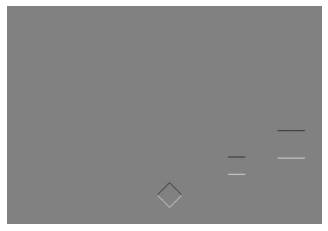

In [7]:
from skimage import io
filtered = io.imread(os.path.join("filter2.jpg"))
myimshow(filtered)

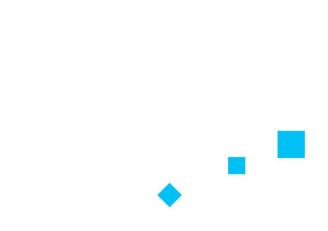

In [8]:
quadrati = io.imread(os.path.join("quadrati.jpg"))
myimshow(quadrati)

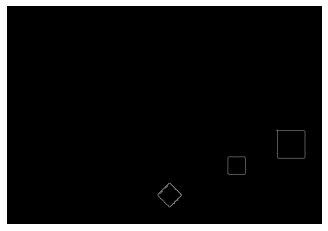

In [123]:
from scipy import ndimage
bn = skimage.img_as_ubyte(rgb2gray(quadrati))
#myimshow(bn)
edges = cv2.Canny(bn,50,100,None,3)
myimshow(edges)


# Esercizio 3

Mostrare gli effetti e spiegare cosa succedequando si applica due volte un filtro gaussiano

Data un'immagine _img_ applicare il filtro gaussiano G

img1 = G(G(img))

A cosa equivale questa trasformazione?
Fornire un esempio

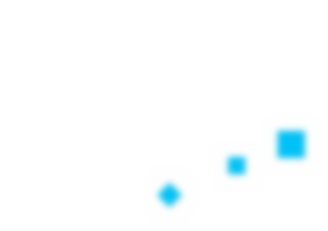

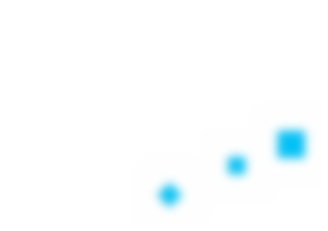

In [113]:
from skimage import filters
gaussian_result1 = filters.gaussian(quadrati,sigma=10,multichannel=True)
myimshow(gaussian_result1)
gaussian_result2 = filters.gaussian(gaussian_result1,sigma=10,multichannel=True)
myimshow(gaussian_result2)

# Esercizio 4

Identificare i cerchi verdi tramite trasformata di Hough contornandoli con un quadrato

![](forme.jpg)

[[ 78 452  25]
 [108 114  95]
 [274 128  65]
 [378 592  29]
 [382  96  44]
 [454 134  23]
 [470 382  50]
 [488 184  14]]


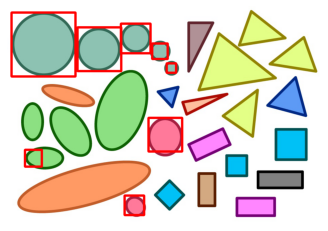

In [64]:
import cv2
forme = io.imread(os.path.join("forme.jpg"))
#myimshow(forme)
gray = rgb2gray(forme)
gray = skimage.img_as_ubyte(gray)
#myimshow(gray)
circles_float = cv2.HoughCircles(gray,cv2.HOUGH_GRADIENT,0.9,minDist=60,param1 = 30, param2 = 45, minRadius = 10, maxRadius = 100)
circles = np.uint16(np.around(circles_float))
circles = np.squeeze(circles)
circles = circles[circles[:,0].argsort()]
to_draw = forme.copy()
for i in range(circles.shape[0]):
  center = circles[i,0],circles[i,1]
  radius = circles[i,2]
  x_sx = center[0] - radius
  y_sx = center[1] -radius
  x_dx = center[0] + radius
  y_dx = center[1] + radius
  cv2.rectangle(to_draw,(x_sx,y_sx),(x_dx,y_dx),(255,0,0),5)
myimshow(to_draw)

# Esercizio 5

Definire una matrice di roto traslazione che effettua una rotazione di 60° in senso orario in (15, 25) e una traslazione di 20 px sull'asse y.

Mostrare e descrivere tutti i passaggi: dalla definizione della matrice all'applicazione della trasformazione

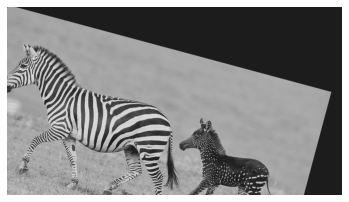

In [76]:
from scipy.ndimage import affine_transform
center = np.array([15,25])
angle = 15*np.pi/180.0
transform = np.array([[np.cos(angle),-np.sin(angle)],[np.sin(angle),np.cos(angle)]])
offset = (center - center.dot(transform)).dot(np.linalg.inv(transform))
dst = affine_transform(zebra,transform,order=2,offset=-offset)
myimshow(dst)


la matrice transform è stata definita, per come visto a lezione:
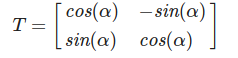

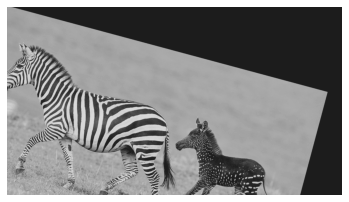

In [89]:
trans = np.array([[1,0,0],[0,1,20],[0,0,1]])
result = affine_transform(dst,trans,mode="constant",cval=0.0)
myimshow(result)


La matrice di traslazione è stata così definita:
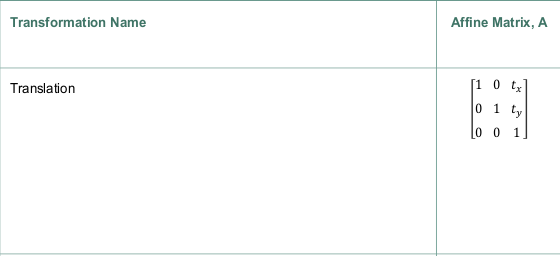

la combinazione delle due matrici è così ottenuta:
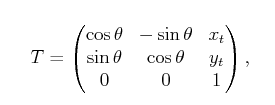

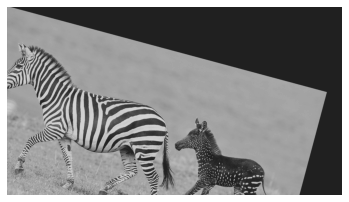

In [131]:
T = np.array([[np.cos(angle),-np.sin(angle),0],[np.sin(angle),np.cos(angle),20],[0,0,1]])
r = affine_transform(zebra,T,mode="constant",cval=0.0)
myimshow(r)